# Week 2 Check-In
## Team Spotiflies: Joanna, Aaron, Aubrey, Kennedy, Aster, Ethan
### Data Cleaning

In [2]:
%pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# Reading in the data
spotify = pd.read_csv("dataset.csv")
spotify

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


We decided to remove the "Unnamed: 0" column, since we can uniquely identify songs from their ID:

In [4]:
spotify_clean = spotify.drop(columns=["Unnamed: 0"])

Then we looked into NA values, and found one observation. We decided to drop this row since it has many unexpected statistics and missing values, like popularity being 0 as well:

In [5]:
spotify_clean.isna().sum()
spotify_clean[spotify_clean.isna().any(axis=1)]
spotify_clean = spotify_clean.dropna()

We found that there were entries that had implausible 0 values, specifically in time signature (163 observations) and tempo (157 observations). 

In [6]:
print("Tempos < 10: ", spotify_clean["tempo"].lt(10).sum())
print("Time signatures == 0: ", spotify_clean["time_signature"].eq(0).sum())
print("Both zero: ", spotify_clean[spotify_clean["time_signature"].eq(0)]["tempo"].lt(10).sum())

Tempos < 10:  157
Time signatures == 0:  163
Both zero:  157


However, we decided to keep these rows in our cleaned dataset, as the average instrumentalness of these rows was much higher than average (0.65 vs 0.15), and we didn't want to unintentionally bias the data against instrumental tracks. Additionally, the overall count of these suspicious rows wasn't very high compared to size of the entire dataset (163 vs > 114k).

In [7]:
spotify_clean.describe() # Notice the mean of instumentalness before removing the suspicious rows

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [8]:
spotify_clean.query("tempo == 0").describe() # Notice the mean of instumentalness after removing the suspicious tempo rows

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,157.000000,1.570000e+02,157.0,157.000000,157.000000,157.000000,157.000000,157.0,157.000000,157.000000,157.000000,157.0,157.0,157.0
mean,37.197452,1.718307e+05,0.0,0.122914,5.248408,-22.092503,0.687898,0.0,0.496735,0.650488,0.454720,0.0,0.0,0.0
std,11.083853,4.033507e+05,0.0,0.250220,3.970494,9.677911,0.464834,0.0,0.408839,0.386391,0.320175,0.0,0.0,0.0
min,0.000000,8.586000e+03,0.0,0.000000,0.000000,-49.531000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,33.000000,7.470000e+04,0.0,0.000020,1.000000,-27.035000,0.000000,0.0,0.122000,0.289000,0.117000,0.0,0.0,0.0
50%,35.000000,9.345100e+04,0.0,0.000638,5.000000,-20.356000,1.000000,0.0,0.360000,0.864000,0.389000,0.0,0.0,0.0
75%,41.000000,1.470000e+05,0.0,0.062800,10.000000,-16.680000,1.000000,0.0,0.936000,0.984000,0.718000,0.0,0.0,0.0
max,85.000000,3.601693e+06,0.0,0.999000,11.000000,-0.689000,1.000000,0.0,0.996000,1.000000,0.989000,0.0,0.0,0.0


In [9]:
spotify_clean[spotify_clean["time_signature"].eq(0)].describe() # Notice the mean of instumentalness after removing the suspicious time signature rows

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,163.000000,1.630000e+02,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.0
mean,36.975460,1.732399e+05,0.015258,0.132486,5.257669,-21.833135,0.680982,0.002209,0.499812,0.637517,0.441471,0.013727,4.453074,0.0
std,11.095517,3.959886e+05,0.081453,0.255605,3.949666,9.876071,0.467533,0.011476,0.407310,0.393416,0.321509,0.082986,23.310021,0.0
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,33.000000,7.581450e+04,0.000000,0.000020,1.000000,-27.498500,0.000000,0.000000,0.125500,0.220000,0.112500,0.000000,0.000000,0.0
50%,35.000000,9.345100e+04,0.000000,0.000660,5.000000,-20.356000,1.000000,0.000000,0.360000,0.851000,0.363000,0.000000,0.000000,0.0
75%,41.500000,1.573545e+05,0.000000,0.116000,9.000000,-16.377500,1.000000,0.000000,0.940500,0.980500,0.718000,0.000000,0.000000,0.0
max,85.000000,3.601693e+06,0.605000,0.999000,11.000000,-0.689000,1.000000,0.075000,0.996000,1.000000,0.989000,0.639000,153.274000,0.0


To be continued...

In [10]:
# Exporting our cleaned dataset for analysis
spotify_clean.to_csv('csv_outputs/cleaned_spotify.csv', index=False) 

### Exploratory Data Analysis (EDA)

In [11]:
# Read in the cleaned data
spotify = pd.read_csv('csv_outputs/cleaned_spotify.csv')

# Select only numeric columns (remove categorical ones)
# Removed categorical columns: key, time signature, mode
numeric_spotify = spotify.select_dtypes(include=[np.number])
numeric_spotify = numeric_spotify.loc[:, ~numeric_spotify.columns.isin(["mode", "key", "time_signature"])]

# Correlation matrix
spotify_corr = numeric_spotify.corr()

spotify_corr.to_csv('csv_outputs/correlation_matrix.csv')

We started our EDA by making a correlation heatmap of every quantitative variable, checking to see which variables seem to have some sort of relationship. 

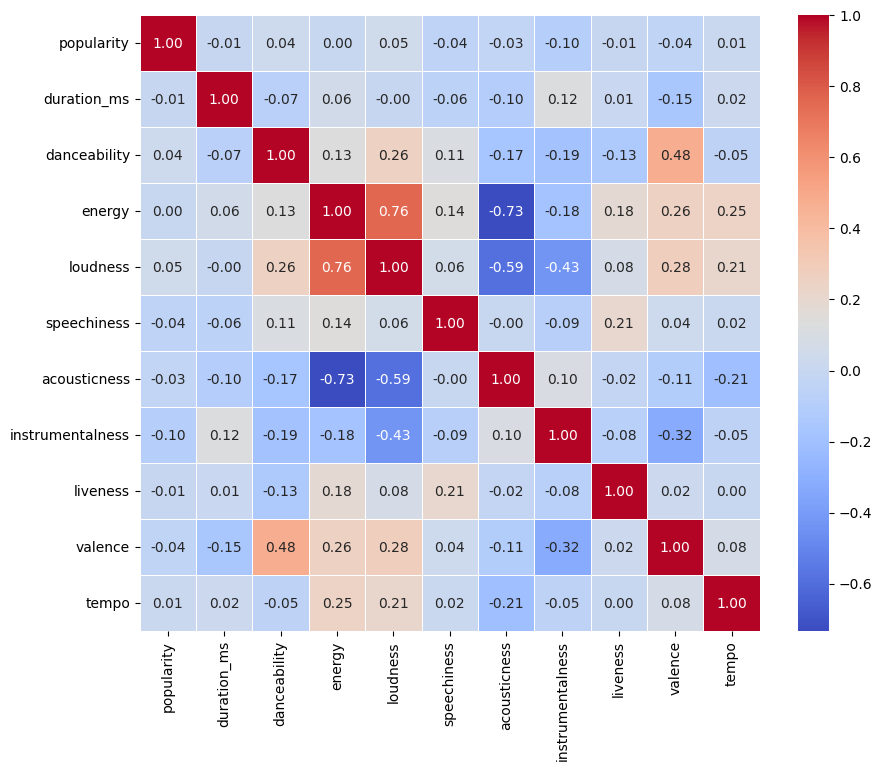

In [12]:
# Making correlation heatmap
plt.figure(figsize=(10, 8))  # Optional: Adjust the figure size
sns.heatmap(spotify_corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

Based on this, we decided to plot more detailed scatterplots of the correlations larger than 0.4 or smaller than -0.4. 

We then plotted a linear and quadratic regression for each.

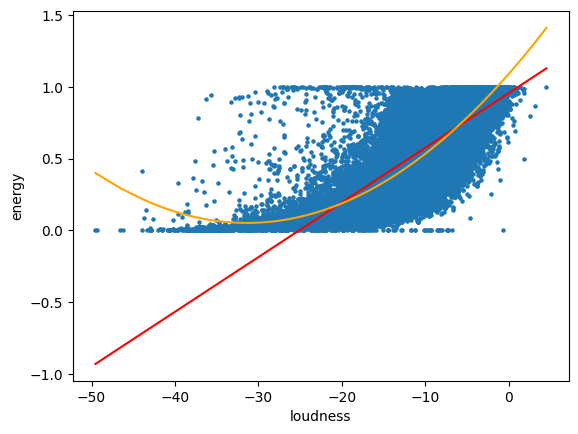

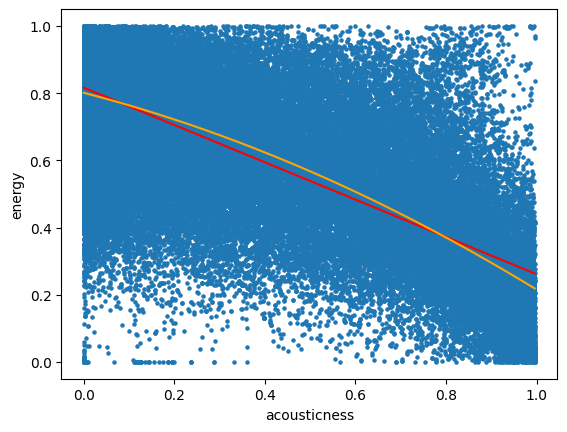

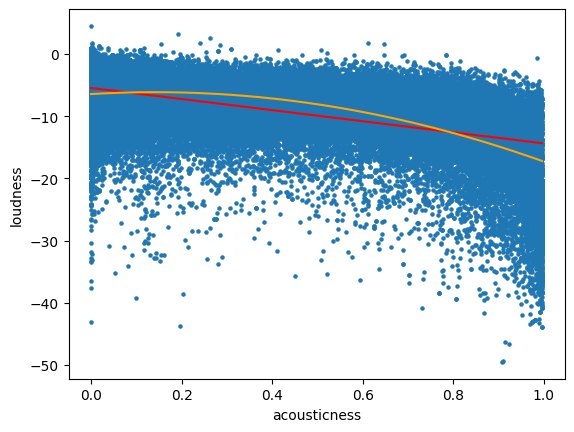

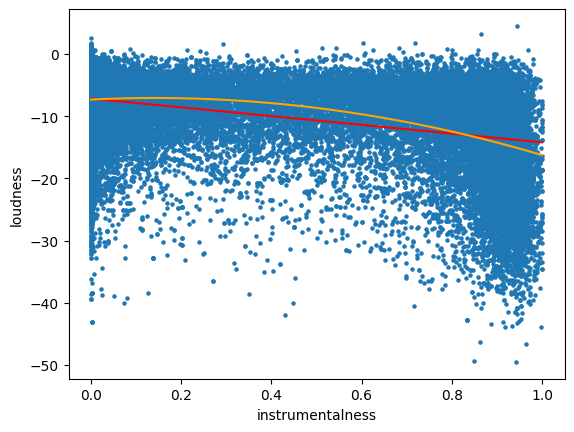

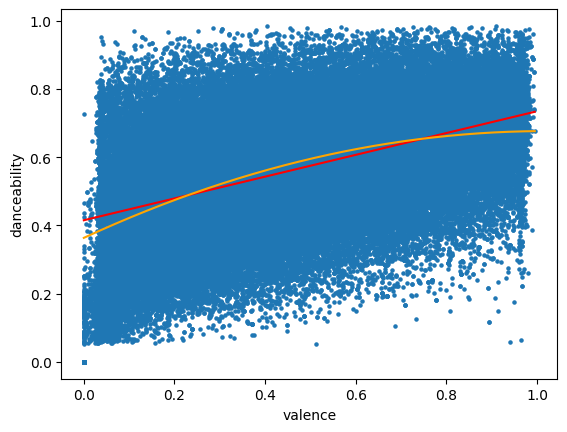

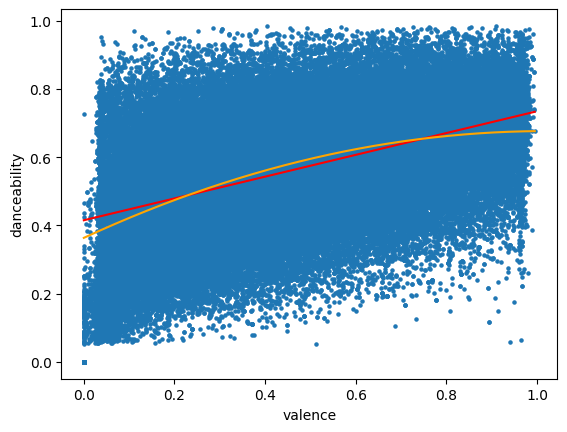

In [25]:
# Making scatterplots for each variable vs popularity 
correlated_features = [
    ("loudness", "energy"),
    ("acousticness", "energy"),
    ("acousticness", "loudness"),
    ("instrumentalness", "loudness"),
    ("valence", "danceability"),
    ("valence", "danceability"),
]
for (i, j) in correlated_features:
    plt.plot(np.unique(numeric_spotify[i]), np.poly1d(np.polyfit(numeric_spotify[i], numeric_spotify[j], 1))(np.unique(numeric_spotify[i])), color='red')
    plt.plot(np.unique(numeric_spotify[i]), np.poly1d(np.polyfit(numeric_spotify[i], numeric_spotify[j], 2))(np.unique(numeric_spotify[i])), color='orange')
    plt.scatter(numeric_spotify[i], numeric_spotify[j], s=5)
    plt.xlabel(i)
    plt.ylabel(j)
    plt.show()

From these, we thought the shapes of the (acousticness vs loudness), (instrumentalness vs loudness), (acousticness vs energy), and (energy vs loudness) graphs were interesting. We decided to do some exploration on these variables individually:

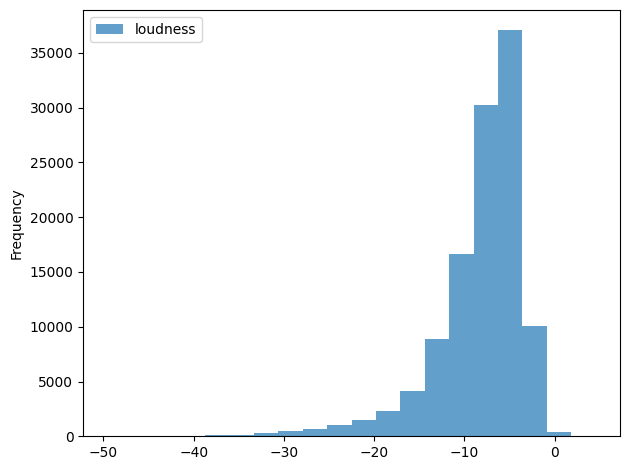

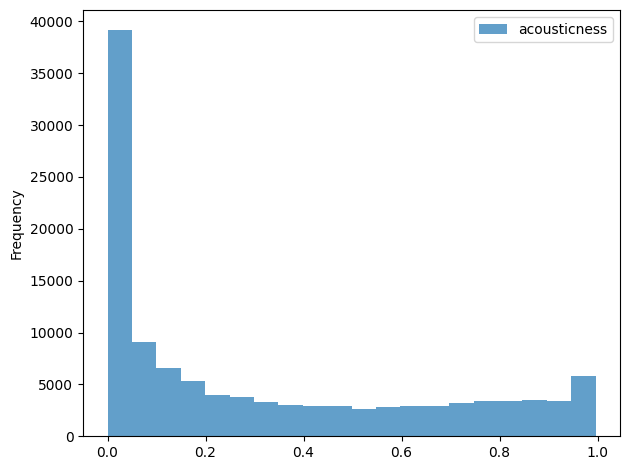

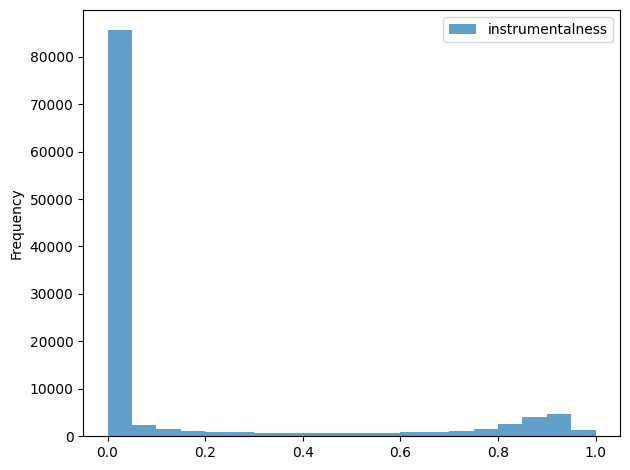

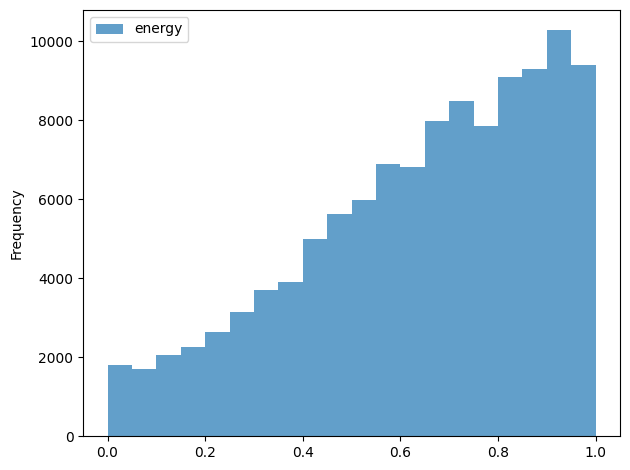

In [41]:
# loudness, acousticness, instrumentalness, energy
interesting_variables = ['loudness', 'acousticness', 'instrumentalness', 'energy']
for var in interesting_variables:
    spotify_clean[[var]].plot.hist(
        bins=20, alpha=0.7, layout=(2, 2), legend=True
    )
    plt.tight_layout()
    plt.show()

We might need to use a stratified sample for acousticness and instrumentalness because the frequency of songs with low values in these variables is very high.

To be continued...